In [1]:
#Expolatrory data analysis (EDA) dataset: "StudentsPerformance (2).csv"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('StudentsPerformance (2).csv')

In [5]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
df.shape

(1000, 8)

In [9]:
# Data Checking to perform 

SyntaxError: invalid syntax (1409534250.py, line 1)

In [10]:
#1. Checking missing value
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [29]:
#2. Check Duplicate value

In [14]:
#OR
df.duplicated().sum()

0

In [15]:
#3. checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [16]:
#4. check the number of unique value 
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [17]:
#5. check stastic of the dataset

df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [23]:
[feature for feature in df.columns if df[feature].dtype == 'O']

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [21]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [24]:
#segrregate numerical and categorical feature

In [27]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categirical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

In [26]:
numerical_feature

['math score', 'reading score', 'writing score']

In [28]:
categirical_feature

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [30]:
for i in df.columns:
    print(df[i].value_counts())
    print('--------------------')

female    518
male      482
Name: gender, dtype: int64
--------------------
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
--------------------
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64
--------------------
standard        645
free/reduced    355
Name: lunch, dtype: int64
--------------------
none         642
completed    358
Name: test preparation course, dtype: int64
--------------------
65    36
62    35
69    32
59    32
61    27
      ..
24     1
28     1
33     1
18     1
8      1
Name: math score, Length: 81, dtype: int64
--------------------
72    34
74    33
64    32
67    30
73    30
      ..
28     1
26     1
17     1
32     1
40     1
Name: reading score, Length: 72, dtype: int64
--------------------
74    35
70    33
68    31
73    28
80    27
      ..

In [31]:
df['total_score'] = (df['math score'] + df['reading score'] + df['writing score'])
df['average'] = df['total_score'] / 3
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [32]:
#Explore visulization

<Axes: xlabel='average', ylabel='Count'>

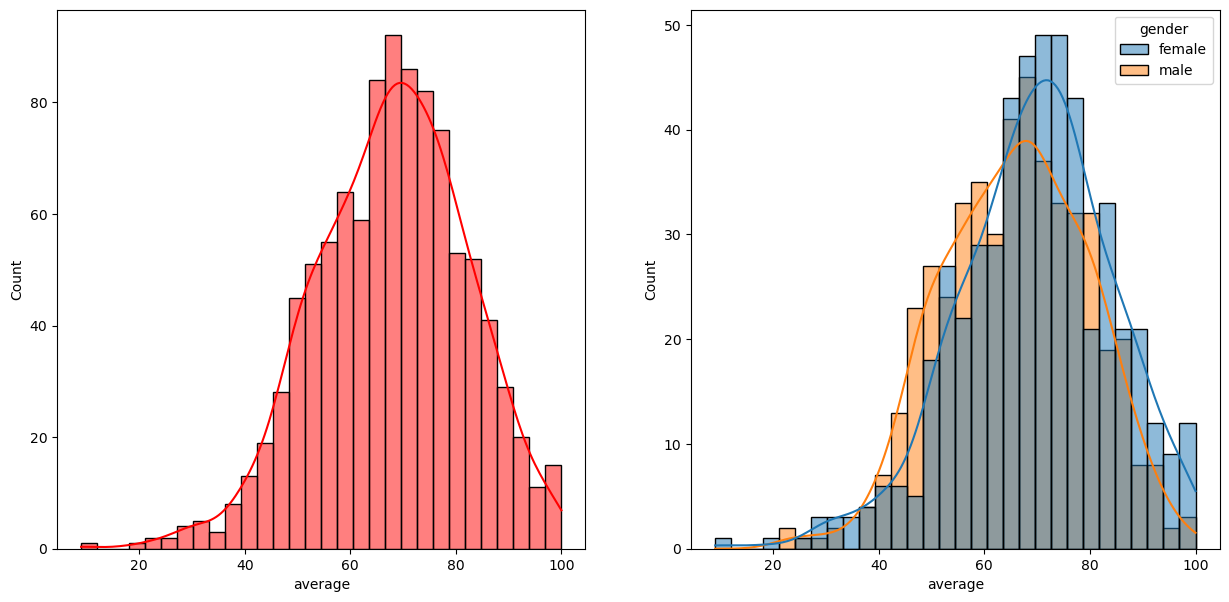

In [42]:
fig, axis = plt.subplots(1,2,figsize=(15,7))
#1st box
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='r')
#2nd box
plt.subplot(122)
sns.histplot(data=df, x='average', bins=30, kde=True,hue='gender' )

<Axes: xlabel='average', ylabel='Count'>

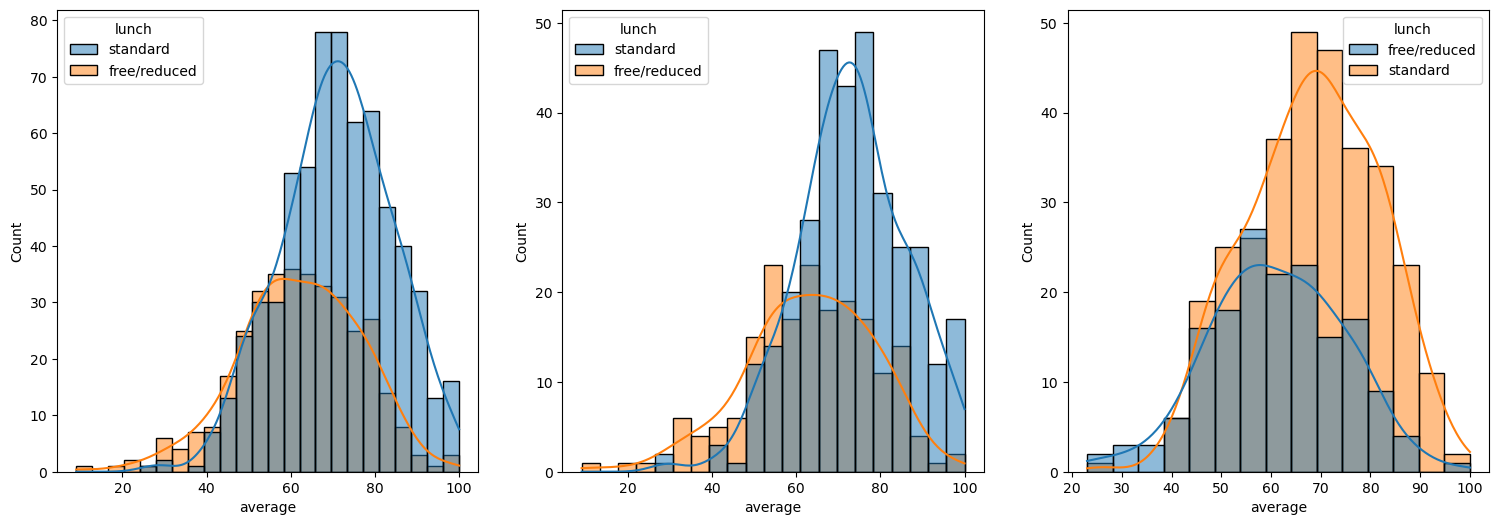

In [56]:
plt.subplots(1,3,figsize=(25,6))


plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')

plt.subplot(142)
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='lunch')

plt.subplot(143)
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='lunch')

<Axes: xlabel='average', ylabel='Count'>

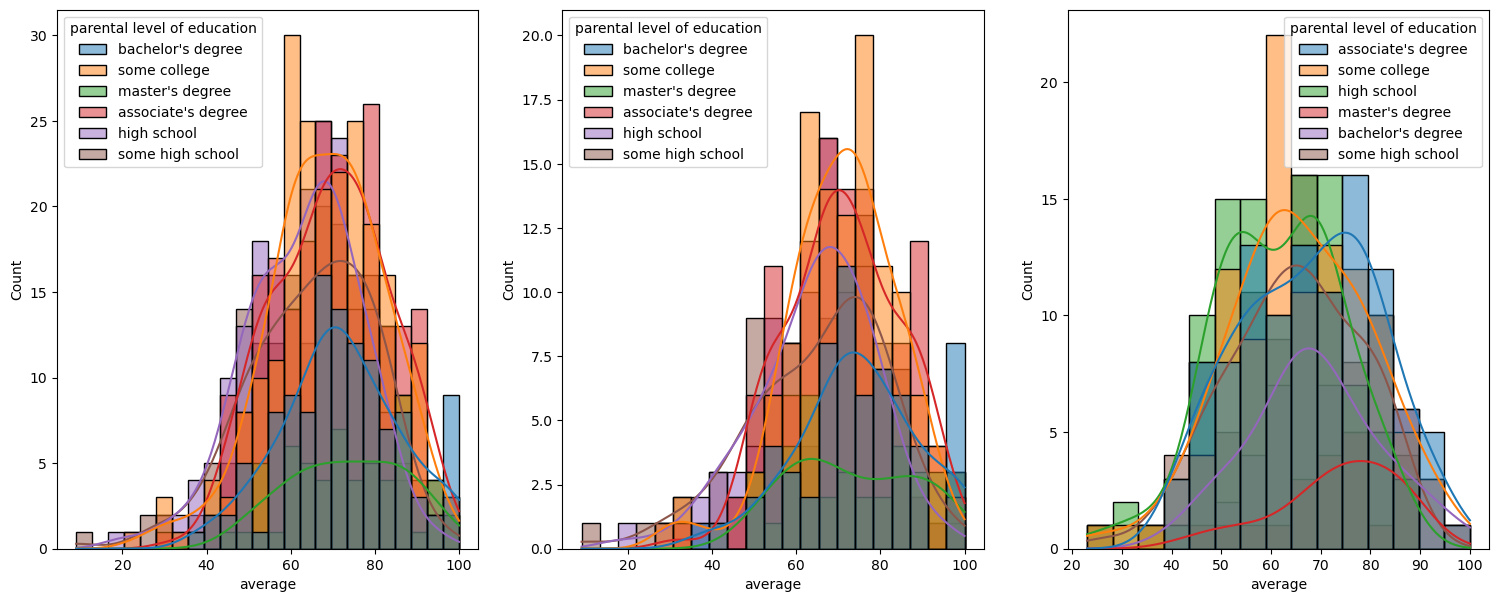

In [62]:
plt.subplots(1,3,figsize=(25,7))
    
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='parental level of education')

plt.subplot(142)
sns.histplot(data=df[df['gender'] == 'female'], x='average',kde=True, hue='parental level of education')

plt.subplot(143)
sns.histplot(data=df[df['gender'] == 'male'], x='average',kde=True, hue='parental level of education')

<Axes: xlabel='race/ethnicity', ylabel='Count'>

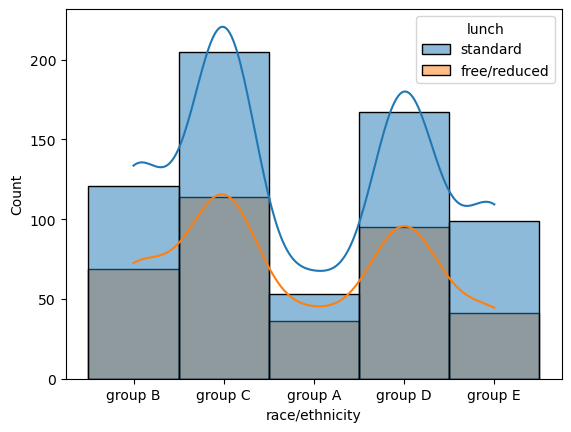

In [73]:
sns.histplot(data=df, x='race/ethnicity', kde=True, hue='lunch')